<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X anuncia el lanzamiento del cohete Falcon 9 en su sitio web con un costo de 62 millones de dólares; otros proveedores cuestan más de 165 millones de dólares cada uno. Gran parte del ahorro se debe a que Space X puede reutilizar la primera etapa. Por lo tanto, si podemos determinar si la primera etapa aterrizará, podemos determinar el costo del lanzamiento. Esta información puede utilizarse si otra empresa desea pujar contra Space X por el lanzamiento de un cohete. En este laboratorio, creará una secuencia de aprendizaje automático para predecir si la primera etapa aterrizará, basándose en los datos de los laboratorios anteriores.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Realizar un análisis exploratorio de datos y determinar las etiquetas de entrenamiento.

* Crear una columna para la clase.
* Estandarizar los datos.
* Dividir los datos en datos de entrenamiento y de prueba.

\- Encontrar el mejor hiperparámetro para SVM, árboles de clasificación y regresión logística.

* Encontrar el método con mejor rendimiento utilizando datos de prueba.


## Import Libraries and Define Auxiliary Functions


In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

Esta función sirve para graficar la matriz de confusión.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)

    plt.figure(figsize=(4, 3))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Cree una matriz NumPy a partir de la columna <code>Class</code> en <code>data</code>, aplicando el método <code>to_numpy()</code> y luego asígnela a la variable <code>Y</code>. Asegúrese de que la salida sea una serie de Pandas (solo un corchete df\['nombre de la columna']).


In [8]:
Y = data['Class'].to_numpy()


## TASK  2


Estandarice los datos en <code>X</code> y luego reasignelos a la variable <code>X</code> usando la transformación proporcionada a continuación.


In [9]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)


Dividimos los datos en datos de entrenamiento y de prueba mediante la función <code>train_test_split</code>. Los datos de entrenamiento se dividen en datos de validación y un segundo conjunto se utiliza para los datos de entrenamiento. A continuación, se entrenan los modelos y se seleccionan los hiperparámetros mediante la función <code>GridSearchCV</code>.


## TASK  3


Utilice la función train_test_split para dividir los datos X e Y en datos de entrenamiento y de prueba. Establezca el parámetro test_size en 0.2 y random_state en 2. Los datos de entrenamiento y de prueba deben asignarse a las siguientes etiquetas.


<code>X_train, X_test, Y_train, Y_test</code>


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Podemos ver que solo tenemos 18 muestras de prueba.


In [11]:
Y_test.shape

(18,)

## TASK  4


Cree un objeto de regresión logística y luego cree un objeto GridSearchCV <code>logreg_cv</code> con cv = 10. Ajuste el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.


In [12]:
models = []
parameters_lr ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression(random_state = 12345)


In [13]:
logreg_cv = GridSearchCV(estimator = lr,
    param_grid = parameters_lr,
    scoring = 'accuracy',
    cv = 10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=12345),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

Generamos el objeto <code>GridSearchCV</code> para la regresión logística. Mostramos los mejores parámetros mediante el atributo de datos <code>best_params\_</code> y la precisión de los datos de validación mediante el atributo de datos <code>best_score\_</code>.


In [14]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print('Average cross-validation (CV) accuracy on the training data : {:.3f}'.format(logreg_cv.best_score_))

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Average cross-validation (CV) accuracy on the training data : 0.846


## TASK  5


Calcule la precisión (accuracy) de los datos de prueba utilizando el método <code>score</code>:


In [15]:
accuracy_lr = logreg_cv.score(X_test, Y_test)
models.append({'Model': 'Logistic Regression', 'Score': accuracy_lr})
print("Model accuracy on test data: {:.3f}".format(accuracy_lr))

Model accuracy on test data: 0.833


Veamos la matriz de confusión:


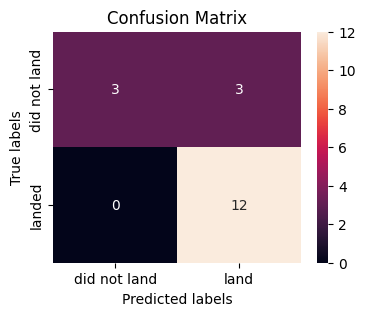

In [16]:
yhat_lr=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_lr)

Al examinar la matriz de confusión, observamos que la regresión logística permite distinguir entre las diferentes clases. El problema reside en los falsos positivos.

Resumen:

Verdadero positivo - 12 (La etiqueta verdadera se obtiene, la etiqueta predicha también se obtiene)

Falso positivo - 3 (La etiqueta verdadera no se obtiene, la etiqueta predicha se obtiene)


## TASK  6


Cree un objeto de máquina de vectores de soporte (support vector machine object) y luego cree un objeto <code>GridSearchCV</code> <code>svm_cv</code> con cv = 10. Ajuste el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.


In [17]:
parameters_svm = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC(random_state = 12345)

In [18]:
#creamos el objeto GridSearchCV 
grid_search_svm = GridSearchCV(
    estimator = svm,
    param_grid = parameters_svm,
    scoring = 'accuracy',
    cv = 10
)

#Lo ajustamos a los datos de entrenamiento
svm_cv = grid_search_svm.fit(X_train, Y_train)

# Limpiar los valores de los hiperparámetros (inicialmente este resultado: 
# tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'})
# Con esta función quito el np.float64
best_params_cleaned = {
    k: float(v) if isinstance(v, np.floating) else v
    for k, v in svm_cv.best_params_.items()
}


In [19]:
#print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("Tuned hyperparameters (best parameters):", best_params_cleaned)
print("Average cross-validation (CV) accuracy on the training data : {:.3f}".format(svm_cv.best_score_))


Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Average cross-validation (CV) accuracy on the training data : 0.848


## TASK  7


Calcule la precisión de los datos de prueba utilizando el método <code>score</code>:


In [20]:
accuracy_svm = svm_cv.score(X_test, Y_test)
models.append({'Model': 'Support Vector Machine', 'Score': accuracy_svm})
print("Model accuracy on test data: {:.3f}".format(accuracy_svm))


Model accuracy on test data: 0.833


We can plot the confusion matrix


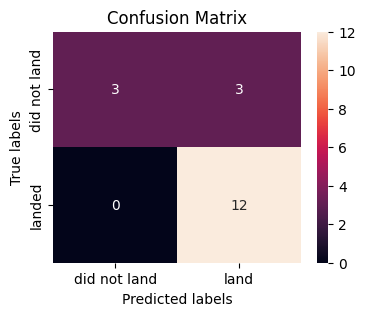

In [21]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Cree un objeto clasificador de árbol de decisión y luego cree un objeto <code>GridSearchCV</code> <code>tree_cv</code> con cv = 10. Ajuste el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.


In [22]:
parameters_tree = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier(random_state = 12345)

In [23]:
#Creamos el objeto
grid_search_tree = GridSearchCV(
    estimator = tree,
    param_grid = parameters_tree,
    scoring = 'accuracy',
    cv = 10
)

#Lo entrenamos
tree_cv = grid_search_tree.fit(X_train, Y_train)

c:\Users\joang\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joang\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\joang\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File 

In [24]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("Average cross-validation (CV) accuracy on the training data : {:.3f}".format(tree_cv.best_score_))   


tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Average cross-validation (CV) accuracy on the training data : 0.873


## TASK  9


Calcule la precisión de tree_cv en los datos de prueba utilizando el método <code>score</code>:


In [25]:
accuracy_tree = tree_cv.score(X_test, Y_test)
models.append({'Model': 'Decision Tree', 'Score': accuracy_tree})
print("Model accuracy on test data: {:.3f}".format(accuracy_tree))

Model accuracy on test data: 0.833


We can plot the confusion matrix


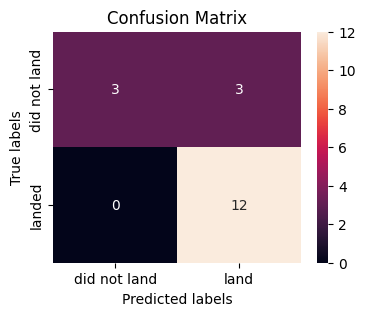

In [26]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Cree un objeto de k vecinos más cercanos (k nearest neighbors object) y luego cree un objeto <code>GridSearchCV</code> <code>knn_cv</code> con cv = 10. Ajuste el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.


In [27]:
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [28]:
# Crear objeto GridSearchCV con 10-fold cross-validation
grid_search_knn = GridSearchCV(
    estimator = KNN,
    param_grid = parameters_knn,
    scoring = 'accuracy',
    cv = 10
)

# Ajustar el modelo a los datos de entrenamiento
knn_cv = grid_search_knn.fit(X_train, Y_train)

In [29]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("Average cross-validation (CV) accuracy on the training data: {:.3f}".format(knn_cv.best_score_))


tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Average cross-validation (CV) accuracy on the training data: 0.848


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [30]:
accuracy_knn = knn_cv.score(X_test, Y_test)
models.append({'Model': 'KNN', 'Score': accuracy_knn})
print("Model accuracy on test data for model KNN: {:.3f}".format(accuracy_knn) )

Model accuracy on test data for model KNN: 0.833


We can plot the confusion matrix


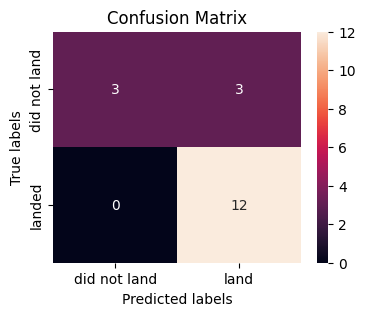

In [31]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [88]:
print("Logistic Regression Test Accuracy: ", logreg_cv.score(X_test, Y_test))
print("SVM Test Accuracy: ", svm_cv.score(X_test, Y_test))
print("Decision Tree Test Accuracy: ", tree_cv.score(X_test, Y_test))
print("KNN Test Accuracy: ", knn_cv.score(X_test, Y_test))

Logistic Regression Test Accuracy:  0.8333333333333334
SVM Test Accuracy:  0.8333333333333334
Decision Tree Test Accuracy:  0.8333333333333334
KNN Test Accuracy:  0.8333333333333334


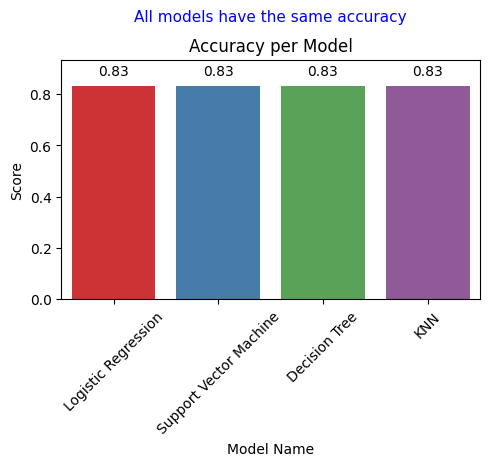

In [57]:
import matplotlib.pyplot as plt

df = pd.DataFrame(models)

plt.figure(figsize=(5, 5))
#barplot = sns.barplot(data=df, x='Model', y='Score', palette='Set1')
barplot = sns.barplot(data=df, x='Model', y='Score', hue='Model', palette='Set1', legend=False)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')

plt.ylim(0, df['Score'].max() + 0.10)
plt.xticks(rotation=45)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.title('Accuracy per Model')

plt.text(1.5, df['Score'].max() + 0.25, 
         'All models have the same accuracy', 
         ha='center', fontsize=11, color='blue')

plt.tight_layout()
plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
